In [65]:
import pypgx
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import os 
import subprocess
import shlex
from matplotlib import image as mpimg


In [55]:
df = pypgx.load_recommendation_table()
df

,Drug,Gene1,Phenotype1,Gene2,Phenotype2,Recommendation
0,tacrolimus,CYP3A5,Normal Metabolizer,None,None,Increase starting dose 1.5 to 2 times recommen...
1,tacrolimus,CYP3A5,Intermediate Metabolizer,None,None,Increase starting dose 1.5 to 2 times recommen...
2,tacrolimus,CYP3A5,Possible Intermediate Metabolizer,None,None,None
3,tacrolimus,CYP3A5,Poor Metabolizer,None,None,Initiate therapy with standard recommended dos...
4,tacrolimus,CYP3A5,Indeterminate,None,None,None
...,...,...,...,...,...,...
719,atomoxetine,CYP2D6,Ultrarapid Metabolizer,None,None,Initiate with a dose of 40 mg/day and increase...
720,atomoxetine,CYP2D6,Normal Metabolizer,None,None,Initiate with a dose of 40 mg/day and increase...
721,atomoxetine,CYP2D6,Intermediate Metabolizer,None,None,Initiate with a dose of 40 mg/day and increase...
722,atomoxetine,CYP2D6,Poor Metabolizer,None,None,Initiate with a dose of 40 mg/day and if no cl...


In [4]:
vf = pypgx.build_definition_table('CYP4F2')
vf.df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,*2,*3
0,19,15990431,rs2108622,C,T,.,.,VI=V433M,GT,0,1
1,19,16008388,rs3093105,A,C,.,.,VI=W12G,GT,1,0


In [6]:
pypgx.list_variants('CYP2B6', alleles='*6', mode='core')


['19-41512841-G-T', '19-41515263-A-G']

In [7]:
pypgx.list_variants('CYP2B6', alleles='*7', mode='core')


['19-41512841-G-T', '19-41515263-A-G', '19-41522715-C-T']

In [8]:
pypgx.collapse_alleles('CYP2B6', ['*6', '*7'])

['*7']

In [9]:
pypgx.get_exon_starts('CYP2D6')

[42522500,
 42522852,
 42523448,
 42523843,
 42524175,
 42524785,
 42525034,
 42525739,
 42526613]

In [10]:
print(pypgx.get_priority('CYP2D6', 'Normal Metabolizer'))
#'Normal/Routine/Low Risk'
print(pypgx.get_priority('CYP2D6', 'Ultrarapid Metabolizer'))
print(pypgx.get_priority('CYP3A5', 'Poor Metabolizer'))

Normal/Routine/Low Risk
Abnormal/Priority/High Risk
Normal/Routine/Low Risk


In [11]:
pypgx.get_score('CYP2D6', '*1')

1.0

In [12]:
pypgx.get_variant_impact('10-96541756-T-A')

'Splice Defect'

In [13]:
drugs = ['nortriptyline', 'sertraline', 'atorvastatin', 'succinylcholine', 'tamoxifen', 'methoxyflurane', 'meloxicam', 
'thioguanine', 'ondansetron', 'fluvoxamine', 'halothane', 'atomoxetine', 'tenoxicam', 'ribavirin', 'clomipramine', 
'peginterferon alfa-2a', 'dexlansoprazole', 'fluorouracil', 'omeprazole', 'amitriptyline', 'celecoxib', 'rosuvastatin',
'fluvastatin', 'tropisetron', 'doxepin', 'hormonal contraceptives for systemic use', 'flurbiprofen', 'ivacaftor', 'tramadol',
'pravastatin', 'sevoflurane', 'hydrocodone', 'citalopram', 'lansoprazole', 'enflurane', 'ibuprofen', 'escitalopram',
'mercaptopurine', 'lornoxicam', 'desipramine', 'imipramine', 'codeine', 'piroxicam', 'azathioprine', 'isoflurane', 
'lovastatin', 'pitavastatin', 'paroxetine', 'desflurane', 'peginterferon alfa-2b', 'trimipramine', 'simvastatin', 
'capecitabine', 'voriconazole', 
'atazanavir', 'tacrolimus', 'efavirenz',
'pantoprazole', 'clopidogrel']

In [51]:
drug = drugs[6] # a random drug from the list 
vcf = "./uploads/test.vcf.gz"
name_ = "results_pipeline"

In [52]:
focus_df = df.loc[(df['Drug'] == str(drug).lower())]

groups = (focus_df.groupby(["Drug"]))

genes=[]
for ind , row in focus_df.iterrows():
    genes.append(row["Gene1"])


unqiue_genes = list(set(genes))
print(unqiue_genes)


#if len(unqiue_genes)==1:
   



    

['CYP2C9']


In [61]:
pypgx.api.pipeline.run_ngs_pipeline(str(unqiue_genes[0]).upper() ,name_ , variants=vcf)
#os.chdir("./{dir}".format(dir=id))
print("pipeline done !")
os.chdir(name_)
subprocess.run(shlex.split("unzip results.zip".format(dir=id)))
print("unzipped")


file = [f for f in os.listdir("./")  if f.startswith("tmp") ]

print(file[0])
df2 = pd.read_csv("{dir}/data.tsv".format(dir=file[0]),sep='\t')

genotype = str(df2["Genotype"])
phenotype = (df2["Phenotype"][0])
print(phenotype)

os.chdir("../")


#recommendation = str(df.loc[(df['Drug'] == str(drug).lower())])
recommendation = focus_df[focus_df["Phenotype1"]==phenotype]["Recommendation"]
rec=recommendation.to_frame()
print(rec.columns)
df3 = rec.drop_duplicates(keep='first') #Removing duplicates and just keeping the first hit
print(df3)
df3.to_csv('rec2.csv')










Saved VcfFrame[Imported] to: results_pipeline/imported-variants.zip
Saved VcfFrame[Phased] to: results_pipeline/phased-variants.zip
Saved VcfFrame[Consolidated] to: results_pipeline/consolidated-variants.zip
Saved SampleTable[Alleles] to: results_pipeline/alleles.zip
Saved SampleTable[Genotypes] to: results_pipeline/genotypes.zip
Saved SampleTable[Phenotypes] to: results_pipeline/phenotypes.zip
Saved SampleTable[Results] to: results_pipeline/results.zip
pipeline done !
Archive:  results.zip
  inflating: tmpf2qgoik_/data.tsv    
  inflating: tmpf2qgoik_/metadata.txt  
unzipped
tmpf2qgoik_
Normal Metabolizer
Index(['Recommendation'], dtype='object')
                                       Recommendation
11  Initiate therapy with recommended starting dos...


/home/alterego/anaconda3/envs/AHCG/lib/python3.7/site-packages/pypgx/api/utils.py:855: UserWarning: Only 1 overlapping variant, skip statistical phasing
  warnings.warn("Only 1 overlapping variant, skip statistical phasing")


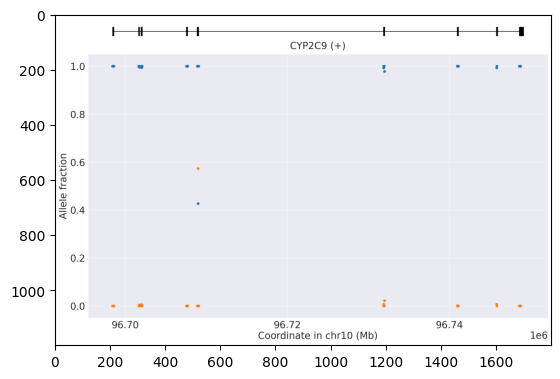

In [68]:
os.chdir(name_)
profile = mpimg.imread("allele-fraction-profile/7843.png")
plt.imshow(profile)



In [69]:
os.chdir("../")